In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import copy
%matplotlib inline

In [2]:
# IRRIGATED
ws_irr_et = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ws_irr_et.csv')
ds_irr_et = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ds_irr_et.csv')
ws_irr_lst = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ws_irr_lst.csv')
ds_irr_lst = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ds_irr_lst.csv')
ws_irr_pcp = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ws_irr_pcp.csv', thousands=',')
ds_irr_pcp = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ds_irr_pcp.csv', thousands=',')
ws_irr_evi = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ws_irr_evi.csv')
ds_irr_evi = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ds_irr_evi.csv')

# RAINFED
ws_rf_et = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ws_rf_et.csv')
ds_rf_et = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ds_rf_et.csv')
ws_rf_lst = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ws_rf_lst.csv')
ds_rf_lst = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ds_rf_lst.csv')
ws_rf_pcp = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ws_rf_pcp.csv', thousands=',')
ds_rf_pcp = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ds_rf_pcp.csv', thousands=',')
ws_rf_evi = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ws_rf_evi.csv')
ds_rf_evi = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver01/ds_rf_evi.csv')

In [3]:
irr_et = pd.concat([ws_irr_et, ds_irr_et]).drop(columns=['system:time_start'])
irr_lst= pd.concat([ws_irr_lst, ds_irr_lst]).drop(columns=['system:time_start'])
irr_pcp= pd.concat([ws_irr_pcp, ds_irr_pcp]).drop(columns=['system:time_start'])
irr_evi= pd.concat([ws_irr_evi, ds_irr_evi])

rf_et = pd.concat([ws_rf_et, ds_rf_et]).drop(columns=['system:time_start'])
rf_lst= pd.concat([ws_rf_lst, ds_rf_lst]).drop(columns=['system:time_start'])
rf_pcp= pd.concat([ws_rf_pcp, ds_rf_pcp]).drop(columns=['system:time_start'])
rf_evi= pd.concat([ws_rf_evi, ds_rf_evi])

In [4]:
irr = pd.concat([irr_evi, irr_et, irr_lst, irr_pcp], axis=1).reset_index(drop='True')
rf = pd.concat([rf_evi, rf_et, rf_lst, rf_pcp], axis=1).reset_index(drop='True')

In [5]:
# Yield and EVI
yieldXls = pd.ExcelFile('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/ver02/yield_irr_rf_q.xlsx')

irrYld = pd.read_excel(yieldXls, 'irr').drop(columns=['Ecosystem','Year'])
rfYld = pd.read_excel(yieldXls, 'rf').drop(columns=['Ecosystem','Year'])
irrYld.tail()

,Yield,Season
33,3.318538,Dry Season
34,3.313385,Dry Season
35,3.516244,Dry Season
36,3.292010,Dry Season
37,3.206299,Dry Season


In [11]:
irr.tail()

,system:time_start,EVI,ET,PET,LST_Day_1km,LST_Night_1km,precipitation
33,"Dec 1, 2014",0.549,20.221,50.606,32.300,22.061,340.897
34,"Dec 1, 2015",0.571,19.762,54.995,33.937,23.084,212.032
35,"Dec 1, 2016",0.597,24.338,46.556,30.277,22.230,580.597
36,"Dec 1, 2017",0.585,24.750,44.637,31.202,22.674,652.749
37,"Dec 1, 2018",0.579,18.535,54.692,33.292,22.305,263.111


In [7]:
#alldata = pd.concat([irr,irrYld],axis=1)
#alldata['system:time_start']=[datetime.strptime(x, '%b %d, %Y') for x in alldata['system:time_start']]
#alldata.head()

,system:time_start,EVI,ET,PET,LST_Day_1km,LST_Night_1km,precipitation,Yield,Season
0,2001-05-01,0.554,21.213,31.511,30.416,23.131,1941.109,3.425188,Wet Season
1,2002-05-01,0.632,22.942,34.522,30.293,22.659,1785.029,3.534941,Wet Season
2,2003-05-01,0.639,23.847,34.900,30.643,22.886,1999.585,4.088931,Wet Season
3,2004-05-01,0.630,25.057,40.017,30.094,22.547,1757.834,4.170155,Wet Season
4,2005-05-01,0.631,21.243,33.749,31.766,23.037,1922.263,3.351111,Wet Season


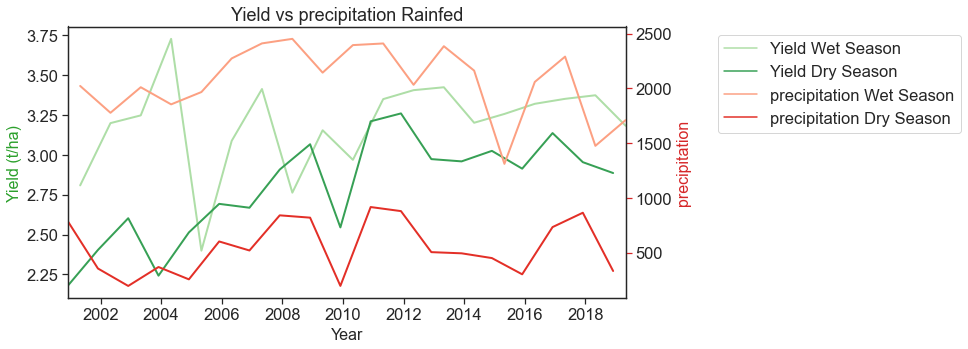

In [7]:
# Variable
var = 'precipitation'
ecosystem = 'Rainfed'
ecovars = copy.copy(rf)
ecoYld = copy.copy(rfYld)

# 
alldata = pd.concat([ecovars,ecoYld],axis=1)
alldata['system:time_start']=[datetime.strptime(x, '%b %d, %Y') for x in alldata['system:time_start']]

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='Yield', hue='Season', data = alldata, ax = ax1, linewidth=2, linestyle='solid', palette='Greens')
#ax1.yaxis.set_ticks(np.arange(3.0, 4.3, 0.2))
ax1.tick_params(axis='y')
#ax1.legend(labels=['Yield Wet Season','Yield Dry Season'])
#ax1.get_legend().remove()

# Reduce margins
ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel(var, fontsize=16, color=color)
sns.lineplot(x='system:time_start', y=var, hue= 'Season', data = alldata, ax = ax2, linewidth=2, linestyle='solid', palette='Reds')
#ax2.legend(labels=['EVI Wet Season','EVI Dry Season'])
#ax2.yaxis.set_ticks(np.arange(0.45, 0.75, 0.05))  

# added these three lines
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, ['Yield Wet Season','Yield Dry Season',var +' Wet Season',var + ' Dry Season'], bbox_to_anchor=(1.15, 1), loc='upper left')#, prop={'size': 14})

ax2.tick_params(axis='y', color=color)
ax2.get_legend().remove()

plt.title('Yield vs ' + var + ' ' + ecosystem)
plt.savefig(var + ecosystem +'.png', dpi=300)
#plt.show()

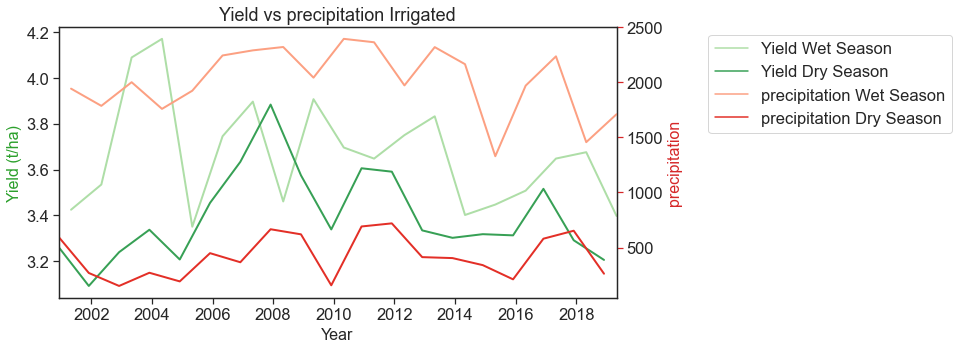

In [9]:
# Variable
var = 'precipitation'
ecosystem = 'Irrigated'
ecovars = copy.copy(irr)
ecoYld = copy.copy(irrYld)

# 
alldata = pd.concat([ecovars,ecoYld],axis=1)
alldata['system:time_start']=[datetime.strptime(x, '%b %d, %Y') for x in alldata['system:time_start']]

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="ticks")

# multiple line plot
font = {'size': 20}

plt.rc('font', **font)

# Create figure and plot space
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

# Set Axis 1 Parameters
color = 'tab:green'
#ax1.set_title('Annual Yield and EVI', fontsize=25)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Yield (t/ha)', fontsize=16, color=color)
sns.lineplot(x='system:time_start', y='Yield', hue='Season', data = alldata, ax = ax1, linewidth=2, linestyle='solid', palette='Greens')
#ax1.yaxis.set_ticks(np.arange(3.0, 4.3, 0.2))
ax1.tick_params(axis='y')
#ax1.legend(labels=['Yield Wet Season','Yield Dry Season'])
#ax1.get_legend().remove()

# Reduce margins
ax1.margins(x=0)

# Setup 2nd Axis
ax2 = ax1.twinx()

# Set Axis 2 Parameters
color = 'tab:red'
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel(var, fontsize=16, color=color)
sns.lineplot(x='system:time_start', y=var, hue= 'Season', data = alldata, ax = ax2, linewidth=2, linestyle='solid', palette='Reds')
#ax2.legend(labels=['EVI Wet Season','EVI Dry Season'])
#ax2.yaxis.set_ticks(np.arange(0.45, 0.75, 0.05))  

# added these three lines
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, ['Yield Wet Season','Yield Dry Season',var +' Wet Season',var + ' Dry Season'], bbox_to_anchor=(1.15, 1), loc='upper left')#, prop={'size': 14})

ax2.tick_params(axis='y', color=color)
ax2.get_legend().remove()

plt.title('Yield vs ' + var + ' ' + ecosystem)
plt.savefig(var + ecosystem +'.png', dpi=300)
#plt.show()